In [118]:
from graphviz import Digraph, Graph

In [8]:
def parse(line):
    [lights, *buttons, joltage] = line.split()
    lights = [1 if c == '#' else 0 for c in lights.strip("[]")]
    buttons = [set(int(c) for c in s.strip("()").split(',')) for s in buttons]
    return (lights, buttons)

with open("examples/10") as f:
    machines = [parse(line) for line in f]

In [40]:
machines
m = machines[0]
m

([0, 1, 1, 0], [{3}, {1, 3}, {2}, {2, 3}, {0, 2}, {0, 1}])

In [103]:
def label(lights):
    return ''.join(map(str, lights))

def graph(machine):
    lights, buttons = machine
    nodes = set()
    edges = set()
    nodes.add(tuple([0]*len(lights)))
    # nodes.add(label(lights))
    def apply(node, button):
        new = list(node)
        for pos in button:
            new[pos] = 1 if new[pos] == 0 else 0
        return tuple(new)
    for button in buttons:
        next = [(node, apply(node, button)) for node in nodes]
        for (old, new) in next:
            nodes.add(new)
            edges.add((old, new, str(button)))
    return (nodes, edges)

In [205]:
def draw_dot(machine, graph):
    lights, buttons = machine
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR', 'size': '12,12'})
    dot.attr('node', color='#666')
    dot.attr('edge', color='#666', fontcolor='#666')
    nodes, edges = graph
    for node in nodes:
        dot.node(label(node))
    for (u, v, e) in edges:
        dot.edge(label(u), label(v), label=e)
    dot.node('0000', style='filled', fillcolor='beige')
    dot.node(label(lights), color='black', style='filled', fillcolor='beige')
    return dot

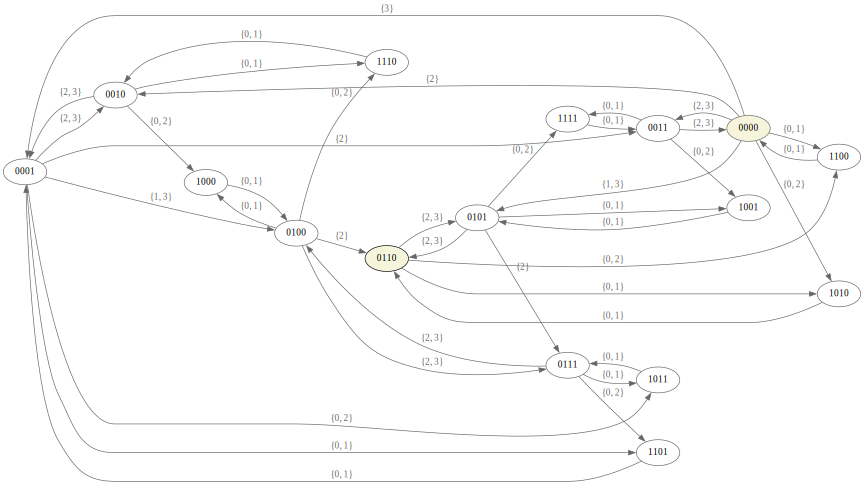

In [206]:
draw_dot(m, graph(m))

In [77]:
a = (1, 2)
tuple(list(map(str, a)))

('1', '2')